# Temporada 2024 de Grandes Ligas de Beisból.

## El siguiente proyecto se realiza con el fin de poner en práctica herramientas estadísticas para reforzar el conocimiento del lenguaje Python, aplicado en este caso a beisbol.

## No se trata de cumplir con un objetivo ni llegar a una conclusión en particular. Simplemente mostrar y "jugar" con datos estadísticos.

## La fuente de donde se obtienen las estadísticas es la página web "Retrosheet" (https://www.retrosheet.org/gamelogs/index.html).

## Retrosheet es una organización sin fines de lucro cuyo sitio web presenta box scores de juegos de las Grandes Ligas de Béisbol (MLB) desde 1871 hasta la actualidad, así como narraciones jugada por jugada de casi todos los encuentros desde la década de 1930.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [3]:
import os
ruta = r"C:\Users\pedro\Desktop\Python"
os.listdir(ruta)


['gl2020_24', 'gl2020_24.zip']

In [4]:
import os
ruta = r"C:\Users\pedro\Desktop\Python\gl2020_24"
os.listdir(ruta)

['gl2020.txt', 'gl2021.txt', 'gl2022.txt', 'gl2023.txt', 'gl2024.txt']

In [5]:
import pandas as pd

ruta = r"C:\Users\pedro\Desktop\Python\gl2020_24\gl2024.txt"

df_2024 = pd.read_csv(ruta, sep=",", header=None)
print(len(df_2024.columns))
df_2024.head()

161


,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,20240320,0,Wed,LAN,NL,1,SDN,NL,1,5,...,Luis Campusano,2,wadet002,Tyler Wade,5,merrj002,Jackson Merrill,8,NaN,Y
1,20240321,0,Thu,SDN,NL,2,LAN,NL,2,15,...,James Outman,8,heywj001,Jason Heyward,9,lux-g001,Gavin Lux,4,NaN,Y
2,20240328,0,Thu,COL,NL,1,ARI,NL,1,1,...,Blaze Alexander,10,thoma004,Alek Thomas,8,perdg001,Gerardo Perdomo,6,NaN,Y
3,20240328,0,Thu,WAS,NL,1,CIN,NL,1,2,...,Spencer Steer,7,martn003,Nick Martini,10,stept001,Tyler Stephenson,2,NaN,Y
4,20240328,0,Thu,SLN,NL,1,LAN,NL,3,1,...,James Outman,8,heywj001,Jason Heyward,9,lux-g001,Gavin Lux,4,NaN,Y


In [6]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429 entries, 0 to 2428
Columns: 161 entries, 0 to 160
dtypes: float64(5), int64(82), object(74)
memory usage: 3.0+ MB


In [7]:
colnames = ['date','dblheader_code','day_of_week','team_v','league_v','game_no_v',
           'team_h','league_h','game_no_h', 'runs_v', 'runs_h','outs_total','day_night',
            'completion_info','forfeit_info','protest_info','ballpark_id','attendance','game_minutes',
            'linescore_v','linescore_h',
           'AB_v','H_v','2B_v','3B_v','HR_v','RBI_v','SH_v','SF_v','HBP_v','BB_v','IBB_v','SO_v',
            'SB_v', 'CS_v','GIDP_v','CI_v','LOB_v',
            'P_num_v','ERind_v','ERteam_v','WP_v','balk_v',
            'PO_v','ASST_v','ERR_v','PB_v','DP_v','TP_v',
           'AB_h', 'H_h', '2B_h', '3B_h', 'HR_h', 'RBI_h', 'SH_h', 'SF_h', 'HBP_h', 'BB_h', 'IBB_h','SO_h',
            'SB_h', 'CS_h', 'GIDP_h', 'CI_h', 'LOB_h',
            'P_num_h', 'ERind_h', 'ERteam_h', 'WP_h', 'balk_h',
            'PO_h', 'ASST_h', 'ERR_h', 'PB_h', 'DP_h', 'TP_h',
            'ump_HB_id', 'ump_HB_name','ump_1B_id', 'ump_1B_name','ump_2B_id', 'ump_2B_name',
            'ump_3B_id', 'ump_3B_name','ump_LF_id', 'ump_LF_name','ump_RF_id', 'ump_RF_name',
            'mgr_id_v', 'mgr_name_v', 'mgr_id_h', 'mgr_name_h',
            'pitcher_id_w','pitcher_name_w','pitcher_id_l','pitcher_name_l','pitcher_id_s','pitcher_name_s',
            'GWRBI_id','GWRBI_name','pitcher_start_id_v','pitcher_start_name_v','pitcher_start_id_h','pitcher_start_name_h',
            'batter1_name_v', 'batter1_id_v', 'batter1_pos_v', 'batter2_name_v', 'batter2_id_v', 'batter2_pos_v',
            'batter3_name_v', 'batter3_id_v', 'batter3_pos_v', 'batter4_name_v', 'batter4_id_v', 'batter4_pos_v',
            'batter5_name_v', 'batter5_id_v', 'batter5_pos_v', 'batter6_name_v', 'batter6_id_v', 'batter6_pos_v',
            'batter7_name_v', 'batter7_id_v', 'batter7_pos_v', 'batter8_name_v', 'batter8_id_v', 'batter8_pos_v',
            'batter9_name_v', 'batter9_id_v', 'batter9_pos_v', 'batter1_name_h', 'batter1_id_h', 'batter1_pos_h',
            'batter2_name_h', 'batter2_id_h', 'batter2_pos_h', 'batter3_name_h', 'batter3_id_h', 'batter3_pos_h',
            'batter4_name_h', 'batter4_id_h', 'batter4_pos_h', 'batter5_name_h', 'batter5_id_h', 'batter5_pos_h',
            'batter6_name_h', 'batter6_id_h', 'batter6_pos_h', 'batter7_name_h', 'batter7_id_h', 'batter7_pos_h',
            'batter8_name_h', 'batter8_id_h', 'batter8_pos_h', 'batter9_name_h', 'batter9_id_h', 'batter9_pos_h',           
           'misc_info','acqui_info'
           ]



df_2024.columns = colnames
print(df_2024)


          date  dblheader_code day_of_week team_v league_v  game_no_v team_h  \
0     20240320               0         Wed    LAN       NL          1    SDN   
1     20240321               0         Thu    SDN       NL          2    LAN   
2     20240328               0         Thu    COL       NL          1    ARI   
3     20240328               0         Thu    WAS       NL          1    CIN   
4     20240328               0         Thu    SLN       NL          1    LAN   
...        ...             ...         ...    ...      ...        ...    ...   
2424  20240929               0         Sun    PIT       NL        162    NYA   
2425  20240929               0         Sun    OAK       AL        162    SEA   
2426  20240929               0         Sun    MIA       NL        162    TOR   
2427  20240930               1         Mon    NYN       NL        161    ATL   
2428  20240930               2         Mon    NYN       NL        162    ATL   

     league_h  game_no_h  runs_v  ...  

In [8]:
display(df_2024)


,date,dblheader_code,day_of_week,team_v,league_v,game_no_v,team_h,league_h,game_no_h,runs_v,...,batter7_id_h,batter7_pos_h,batter8_name_h,batter8_id_h,batter8_pos_h,batter9_name_h,batter9_id_h,batter9_pos_h,misc_info,acqui_info
0,20240320,0,Wed,LAN,NL,1,SDN,NL,1,5,...,Luis Campusano,2,wadet002,Tyler Wade,5,merrj002,Jackson Merrill,8,NaN,Y
1,20240321,0,Thu,SDN,NL,2,LAN,NL,2,15,...,James Outman,8,heywj001,Jason Heyward,9,lux-g001,Gavin Lux,4,NaN,Y
2,20240328,0,Thu,COL,NL,1,ARI,NL,1,1,...,Blaze Alexander,10,thoma004,Alek Thomas,8,perdg001,Gerardo Perdomo,6,NaN,Y
3,20240328,0,Thu,WAS,NL,1,CIN,NL,1,2,...,Spencer Steer,7,martn003,Nick Martini,10,stept001,Tyler Stephenson,2,NaN,Y
4,20240328,0,Thu,SLN,NL,1,LAN,NL,3,1,...,James Outman,8,heywj001,Jason Heyward,9,lux-g001,Gavin Lux,4,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,20240929,0,Sun,PIT,NL,162,NYA,AL,162,4,...,Anthony Volpe,6,riceb001,Ben Rice,3,trevj001,Jose Trevino,2,NaN,Y
2425,20240929,0,Sun,OAK,AL,162,SEA,AL,162,4,...,Jorge Polanco,4,crawj002,J.P. Crawford,6,rojaj001,Josh Rojas,5,NaN,Y
2426,20240929,0,Sun,MIA,NL,162,TOR,AL,162,3,...,Steward Berroa,9,lopej008,Joey Loperfido,7,heint001,Tyler Heineman,2,NaN,Y
2427,20240930,1,Mon,NYN,NL,161,ATL,NL,161,8,...,Travis d'Arnaud,2,urshg001,Giovanny Urshela,5,arcio002,Orlando Arcia,6,NaN,Y


In [9]:
df_2024.shape

(2429, 161)

In [10]:
df_2024.duplicated().sum()

0

In [11]:
df_2024.isnull().sum()

date                 0
dblheader_code       0
day_of_week          0
team_v               0
league_v             0
                  ... 
batter9_name_h       0
batter9_id_h         0
batter9_pos_h        0
misc_info         2419
acqui_info           0
Length: 161, dtype: int64

In [12]:
display(df_2024.isnull().mean() * 100)

date               0.000000
dblheader_code     0.000000
day_of_week        0.000000
team_v             0.000000
league_v           0.000000
                    ...    
batter9_name_h     0.000000
batter9_id_h       0.000000
batter9_pos_h      0.000000
misc_info         99.588308
acqui_info         0.000000
Length: 161, dtype: float64

In [13]:
df_2024[df_2024.isnull().any(axis=1)]

,date,dblheader_code,day_of_week,team_v,league_v,game_no_v,team_h,league_h,game_no_h,runs_v,...,batter7_id_h,batter7_pos_h,batter8_name_h,batter8_id_h,batter8_pos_h,batter9_name_h,batter9_id_h,batter9_pos_h,misc_info,acqui_info
0,20240320,0,Wed,LAN,NL,1,SDN,NL,1,5,...,Luis Campusano,2,wadet002,Tyler Wade,5,merrj002,Jackson Merrill,8,NaN,Y
1,20240321,0,Thu,SDN,NL,2,LAN,NL,2,15,...,James Outman,8,heywj001,Jason Heyward,9,lux-g001,Gavin Lux,4,NaN,Y
2,20240328,0,Thu,COL,NL,1,ARI,NL,1,1,...,Blaze Alexander,10,thoma004,Alek Thomas,8,perdg001,Gerardo Perdomo,6,NaN,Y
3,20240328,0,Thu,WAS,NL,1,CIN,NL,1,2,...,Spencer Steer,7,martn003,Nick Martini,10,stept001,Tyler Stephenson,2,NaN,Y
4,20240328,0,Thu,SLN,NL,1,LAN,NL,3,1,...,James Outman,8,heywj001,Jason Heyward,9,lux-g001,Gavin Lux,4,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,20240929,0,Sun,PIT,NL,162,NYA,AL,162,4,...,Anthony Volpe,6,riceb001,Ben Rice,3,trevj001,Jose Trevino,2,NaN,Y
2425,20240929,0,Sun,OAK,AL,162,SEA,AL,162,4,...,Jorge Polanco,4,crawj002,J.P. Crawford,6,rojaj001,Josh Rojas,5,NaN,Y
2426,20240929,0,Sun,MIA,NL,162,TOR,AL,162,3,...,Steward Berroa,9,lopej008,Joey Loperfido,7,heint001,Tyler Heineman,2,NaN,Y
2427,20240930,1,Mon,NYN,NL,161,ATL,NL,161,8,...,Travis d'Arnaud,2,urshg001,Giovanny Urshela,5,arcio002,Orlando Arcia,6,NaN,Y


## Total de carreras producidas en la temporada

In [14]:
'RBI_h'
'RBI_v'

df_2024['RBI_TOTAL'] = df_2024['RBI_h'] + df_2024['RBI_v']

total_carreras_2024 = df_2024['RBI_TOTAL'].sum()

print(f"El total de carreras anotadas en la temporada 2024 fue: {total_carreras_2024}")

El total de carreras anotadas en la temporada 2024 fue: 20379


In [15]:
df_2024['RBI_TOTAL'].describe()

count    2429.000000
mean        8.389872
std         4.209006
min         0.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        26.000000
Name: RBI_TOTAL, dtype: float64

<Axes: >

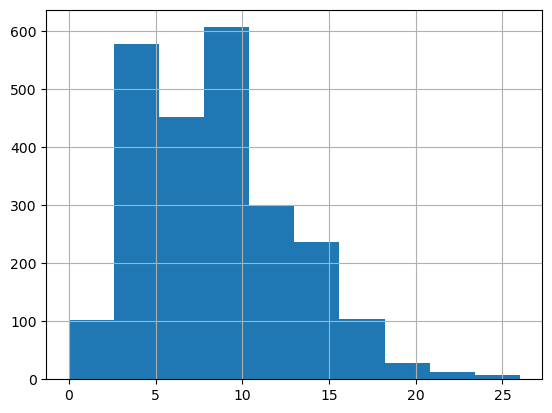

In [16]:
df_2024["RBI_TOTAL"].hist()

## Total de carreras producidas por mes

In [17]:
df_2024["MES"] = df_2024["date"].astype(str).str[4:6]

df_2024.groupby("MES")["RBI_TOTAL"].sum()

MES
03     526
04    3214
05    3325
06    3426
07    3244
08    3561
09    3083
Name: RBI_TOTAL, dtype: int64

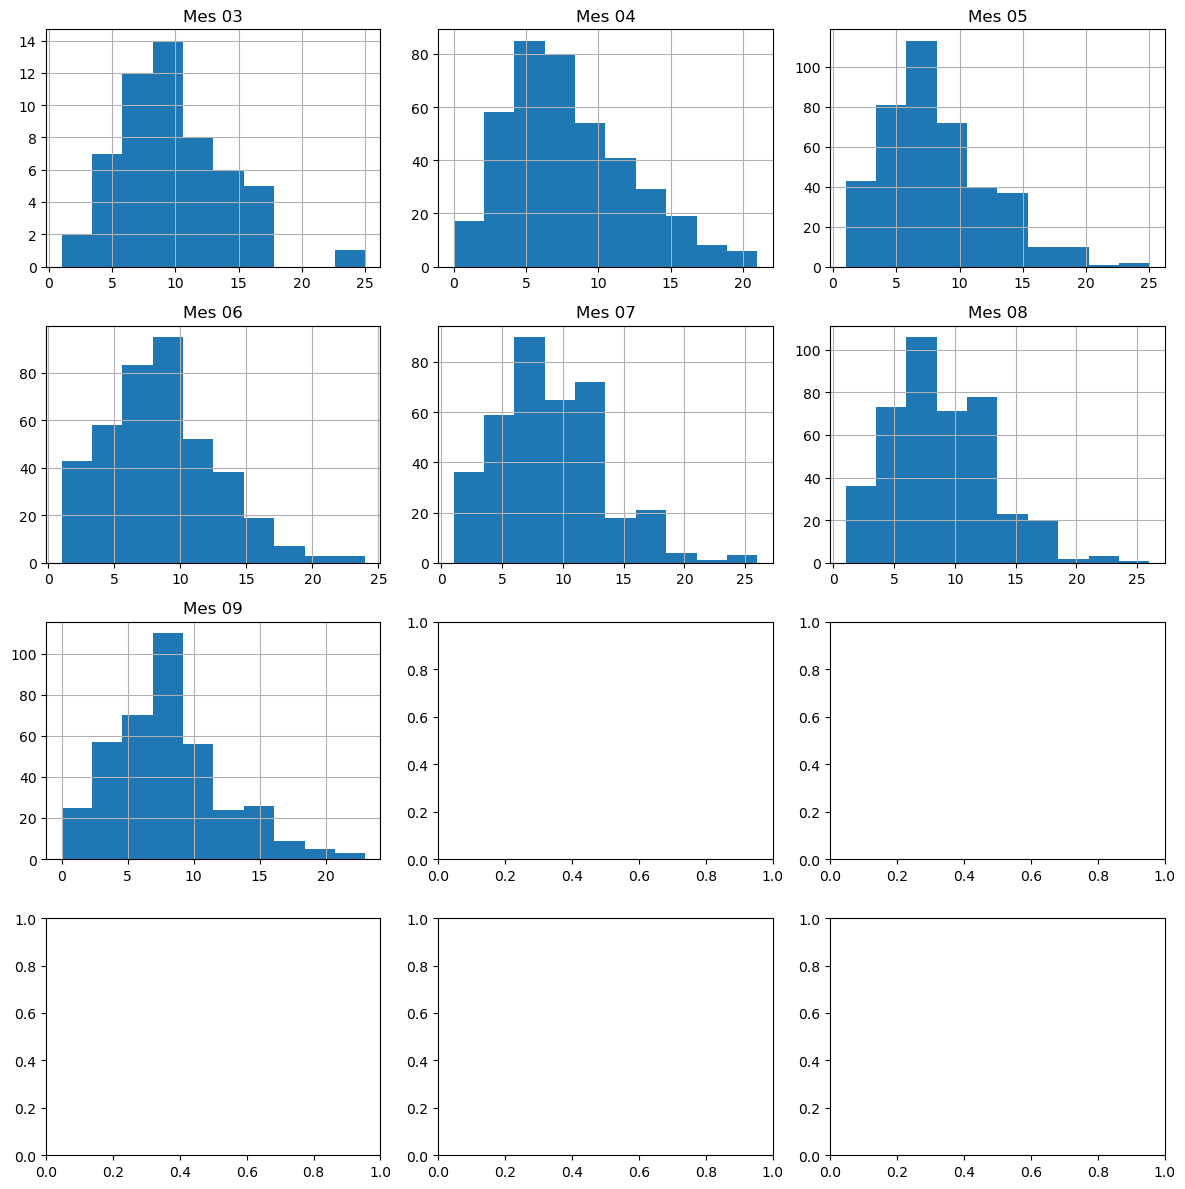

In [18]:
import matplotlib.pyplot as plt

meses = sorted(df_2024["MES"].unique())
fig, axes = plt.subplots(4, 3, figsize=(12,12))  # Ajusta según cuántos meses haya
axes = axes.flatten()

for i, mes in enumerate(meses):
    df_2024[df_2024["MES"] == mes]["RBI_TOTAL"].hist(ax=axes[i], bins=10)
    axes[i].set_title(f"Mes {mes}")

plt.tight_layout()
plt.show()

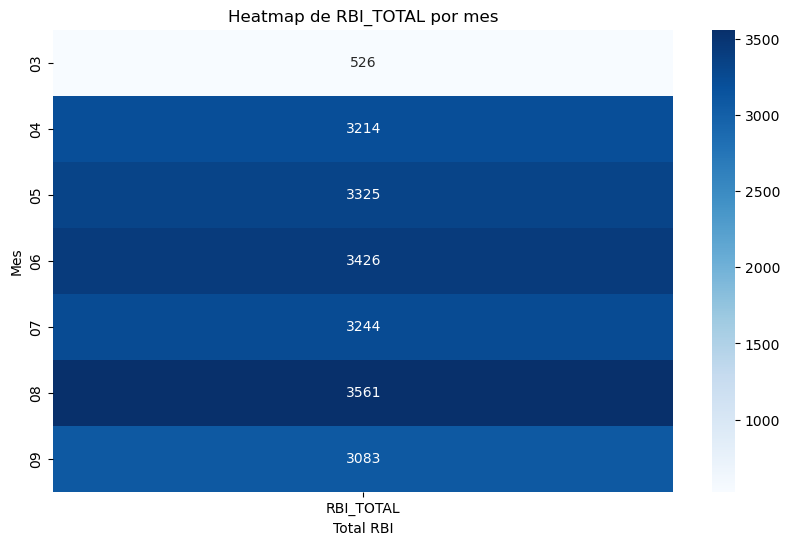

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Agrupamos por mes y contamos RBI_TOTAL
tabla = df_2024.pivot_table(
    values='RBI_TOTAL',
    index='MES',
    aggfunc='sum'
)

# 2. Crear Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(tabla, annot=True, cmap='Blues', fmt='.0f')
plt.title("Heatmap de RBI_TOTAL por mes")
plt.ylabel("Mes")
plt.xlabel("Total RBI")
plt.show()

## Correlación entre carreras producidas y cuadrangulares

In [20]:
#HR_v
#HR_h

df_2024['HR_TOTAL']= df_2024['HR_v'] + df_2024['HR_h']

corr_rbi_hr = df_2024['RBI_TOTAL'].corr(df_2024['HR_TOTAL'])
print("Correlación entre RBI_TOTAL y HR:", corr_rbi_hr)

Correlación entre RBI_TOTAL y HR: 0.5728681817809743


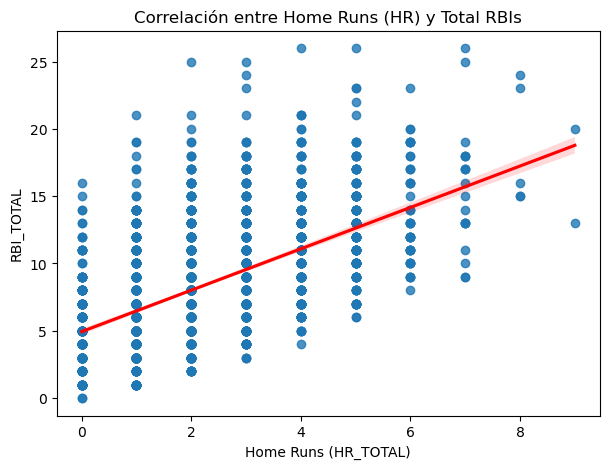

In [21]:
plt.figure(figsize=(7,5))
sns.regplot(x='HR_TOTAL', y='RBI_TOTAL', data=df_2024, line_kws={"color":"red"})
plt.title("Correlación entre Home Runs (HR) y Total RBIs")
plt.xlabel("Home Runs (HR_TOTAL)")
plt.ylabel("RBI_TOTAL")
plt.show()

## TOP 5 de lanzadores mas ganadores

In [22]:
#Pitcher con más juegos ganados
#'pitcher_name_w'

pitcher_wins = df_2024['pitcher_name_w'].value_counts().reset_index()
pitcher_wins.columns = ['pitcher_name', 'wins']

display(pitcher_wins.head())

,pitcher_name,wins
0,Tarik Skubal,18
1,Chris Sale,18
2,Carlos Rodon,16
3,Seth Lugo,16
4,Zack Wheeler,16


In [23]:
df_2024.shape

(2429, 164)

## Total de cuadrangulares conectados en la temporada 2024

In [24]:
colnames = ['date','dblheader_code','day_of_week','team_v','league_v','game_no_v',
           'team_h','league_h','game_no_h', 'runs_v', 'runs_h','outs_total','day_night',
            'completion_info','forfeit_info','protest_info','ballpark_id','attendance','game_minutes',
            'linescore_v','linescore_h',
           'AB_v','H_v','2B_v','3B_v','HR_v','RBI_v','SH_v','SF_v','HBP_v','BB_v','IBB_v','SO_v',
            'SB_v', 'CS_v','GIDP_v','CI_v','LOB_v',
            'P_num_v','ERind_v','ERteam_v','WP_v','balk_v',
            'PO_v','ASST_v','ERR_v','PB_v','DP_v','TP_v',
           'AB_h', 'H_h', '2B_h', '3B_h', 'HR_h', 'RBI_h', 'SH_h', 'SF_h', 'HBP_h', 'BB_h', 'IBB_h','SO_h',
            'SB_h', 'CS_h', 'GIDP_h', 'CI_h', 'LOB_h',
            'P_num_h', 'ERind_h', 'ERteam_h', 'WP_h', 'balk_h',
            'PO_h', 'ASST_h', 'ERR_h', 'PB_h', 'DP_h', 'TP_h',
            'ump_HB_id', 'ump_HB_name','ump_1B_id', 'ump_1B_name','ump_2B_id', 'ump_2B_name',
            'ump_3B_id', 'ump_3B_name','ump_LF_id', 'ump_LF_name','ump_RF_id', 'ump_RF_name',
            'mgr_id_v', 'mgr_name_v', 'mgr_id_h', 'mgr_name_h',
            'pitcher_id_w','pitcher_name_w','pitcher_id_l','pitcher_name_l','pitcher_id_s','pitcher_name_s',
            'GWRBI_id','GWRBI_name','pitcher_start_id_v','pitcher_start_name_v','pitcher_start_id_h','pitcher_start_name_h',
            'batter1_name_v', 'batter1_id_v', 'batter1_pos_v', 'batter2_name_v', 'batter2_id_v', 'batter2_pos_v',
            'batter3_name_v', 'batter3_id_v', 'batter3_pos_v', 'batter4_name_v', 'batter4_id_v', 'batter4_pos_v',
            'batter5_name_v', 'batter5_id_v', 'batter5_pos_v', 'batter6_name_v', 'batter6_id_v', 'batter6_pos_v',
            'batter7_name_v', 'batter7_id_v', 'batter7_pos_v', 'batter8_name_v', 'batter8_id_v', 'batter8_pos_v',
            'batter9_name_v', 'batter9_id_v', 'batter9_pos_v', 'batter1_name_h', 'batter1_id_h', 'batter1_pos_h',
            'batter2_name_h', 'batter2_id_h', 'batter2_pos_h', 'batter3_name_h', 'batter3_id_h', 'batter3_pos_h',
            'batter4_name_h', 'batter4_id_h', 'batter4_pos_h', 'batter5_name_h', 'batter5_id_h', 'batter5_pos_h',
            'batter6_name_h', 'batter6_id_h', 'batter6_pos_h', 'batter7_name_h', 'batter7_id_h', 'batter7_pos_h',
            'batter8_name_h', 'batter8_id_h', 'batter8_pos_h', 'batter9_name_h', 'batter9_id_h', 'batter9_pos_h',           
           'misc_info','acqui_info'
           ]

df_2024['HR_TOTAL'].sum()
print(f"El total de cuadrangulares conectados en la temporada 2024 fue de: {df_2024['HR_TOTAL'].sum()}")

El total de cuadrangulares conectados en la temporada 2024 fue de: 5453


## Visualización de bateadores

In [25]:
df_2024[['batter1_id_v', 'batter2_id_v', 'batter3_id_v', 'batter4_id_v', 'batter5_id_v', 'batter6_id_v', 'batter7_id_v', 'batter8_id_v', 'batter9_id_v', 'batter1_id_h', 'batter2_id_h', 'batter3_id_h', 'batter4_id_h', 'batter5_id_h', 'batter6_id_h', 'batter7_id_h', 'batter8_id_h', 'batter9_id_h']].head(30) 

,batter1_id_v,batter2_id_v,batter3_id_v,batter4_id_v,batter5_id_v,batter6_id_v,batter7_id_v,batter8_id_v,batter9_id_v,batter1_id_h,batter2_id_h,batter3_id_h,batter4_id_h,batter5_id_h,batter6_id_h,batter7_id_h,batter8_id_h,batter9_id_h
0,Mookie Betts,Shohei Ohtani,Freddie Freeman,Will Smith,Max Muncy,Teoscar Hernandez,James Outman,Jason Heyward,Gavin Lux,Xander Bogaerts,Fernando Tatis,Jake Cronenworth,Manny Machado,Ha-Seong Kim,Jurickson Profar,Luis Campusano,Tyler Wade,Jackson Merrill
1,Xander Bogaerts,Fernando Tatis,Jake Cronenworth,Manny Machado,Ha-Seong Kim,Jurickson Profar,Luis Campusano,Tyler Wade,Jackson Merrill,Mookie Betts,Shohei Ohtani,Freddie Freeman,Will Smith,Max Muncy,Teoscar Hernandez,James Outman,Jason Heyward,Gavin Lux
2,Charlie Blackmon,Kris Bryant,Nolan Jones,Brendan Rodgers,Ryan McMahon,Elias Diaz,Ezequiel Tovar,Elehuris Montero,Brenton Doyle,Ketel Marte,Corbin Carroll,Lourdes Gurriel,Christian Walker,Gabriel Moreno,Eugenio Suarez,Blaze Alexander,Alek Thomas,Gerardo Perdomo
3,C. J. Abrams,Lane Thomas,Jesse Winker,Joey Meneses,Joey Gallo,Keibert Ruiz,Eddie Rosario,Ildemaro Vargas,Luis Garcia,Jonathan India,Will Benson,Christian Encarnacion-Strand,Jeimer Candelario,Jake Fraley,Elly De La Cruz,Spencer Steer,Nick Martini,Tyler Stephenson
4,Brendan Donovan,Paul Goldschmidt,Nolan Gorman,Nolan Arenado,Willson Contreras,Alec Burleson,Jordan Walker,Victor Scott,Masyn Winn,Mookie Betts,Shohei Ohtani,Freddie Freeman,Will Smith,Max Muncy,Teoscar Hernandez,James Outman,Jason Heyward,Gavin Lux
5,Connor Joe,Bryan Reynolds,Ke'Bryan Hayes,Andrew McCutchen,Henry Davis,Oneil Cruz,Jared Triolo,Rowdy Tellez,Michael Taylor,Luis Arraez,Josh Bell,Bryan De La Cruz,Jazz Chisholm,Jake Burger,Jesus Sanchez,Tim Anderson,Nick Gordon,Nick Fortes
6,Jung Hoo Lee,Jorge Soler,LaMonte Wade,Matt Chapman,Mike Yastrzemski,Thairo Estrada,Michael Conforto,Patrick Bailey,Nick Ahmed,Xander Bogaerts,Fernando Tatis,Jake Cronenworth,Manny Machado,Ha-Seong Kim,Jurickson Profar,Luis Campusano,Tyler Wade,Jackson Merrill
7,Anthony Rendon,Aaron Hicks,Mike Trout,Taylor Ward,Brandon Drury,Nolan Schanuel,Miguel Sano,Logan O'Hoppe,Zach Neto,Gunnar Henderson,Adley Rutschman,Ryan Mountcastle,Anthony Santander,Austin Hays,Jordan Westburg,Cedric Mullins,Ramon Urias,Jorge Mateo
8,Andy Ibanez,Spencer Torkelson,Riley Greene,Mark Canha,Matt Vierling,Colt Keith,Jake Rogers,Javier Baez,Parker Meadows,Andrew Benintendi,Yoan Moncada,Luis Robert,Eloy Jimenez,Andrew Vaughn,Paul DeJong,Kevin Pillar,Martin Maldonado,Nicky Lopez
9,Gleyber Torres,Juan Soto,Aaron Judge,Giancarlo Stanton,Anthony Rizzo,Anthony Volpe,Alex Verdugo,Jose Trevino,Oswaldo Cabrera,Jose Altuve,Yordan Alvarez,Kyle Tucker,Alex Bregman,Jose Abreu,Chas McCormick,Yainer Diaz,Jeremy Pena,Jake Meyers


## Proporción de cuadrangulares conectados por equipo local y visitante

In [26]:
#'HR_h'
#'HR_v'
#normalize= True devuelve proporciones

HR_equipo_casa= df_2024['HR_h'].value_counts(normalize=True).reset_index()
HR_equipo_visitante= df_2024['HR_v'].value_counts(normalize=True).reset_index()

HR_equipo_casa.columns= ['HR_casa', 'Proporción']

HR_equipo_visitante.columns= ['HR_visitante', 'Proporción']

display(HR_equipo_casa)
display(HR_equipo_visitante)

,HR_casa,Proporción
0,1,0.360231
1,0,0.335529
2,2,0.189790
3,3,0.082338
4,4,0.023055
5,5,0.007410
6,6,0.001235
7,7,0.000412


,HR_visitante,Proporción
0,1,0.354467
1,0,0.340469
2,2,0.194730
3,3,0.076986
4,4,0.026348
5,5,0.004529
6,6,0.002058
7,8,0.000412


## Frecuencia de cuadrangulares conectados por equipo local y visitante

In [27]:
HR_equipo_casa= df_2024['HR_h'].value_counts().reset_index()
HR_equipo_visitante= df_2024['HR_v'].value_counts().reset_index()

HR_equipo_casa.columns= ['HR_casa', 'Frecuencia']

HR_equipo_visitante.columns= ['HR_visitante', 'Frecuencia']

display(HR_equipo_casa)
display(HR_equipo_visitante)

,HR_casa,Frecuencia
0,1,875
1,0,815
2,2,461
3,3,200
4,4,56
5,5,18
6,6,3
7,7,1


,HR_visitante,Frecuencia
0,1,861
1,0,827
2,2,473
3,3,187
4,4,64
5,5,11
6,6,5
7,8,1


## Total de cuadrangulares conectados por equipos locales y visitantes

In [28]:
HR_equipo_casa= df_2024['HR_h'].sum()
HR_equipo_visitante= df_2024['HR_v'].sum()

print(f"El número total de HR conectados por los equipos de casa en el 2024 fueron {HR_equipo_casa}")
print(f"El número total de HR conectados por los equipos visitantes en el 2024 fueron {HR_equipo_visitante}")

El número total de HR conectados por los equipos de casa en el 2024 fueron 2736
El número total de HR conectados por los equipos visitantes en el 2024 fueron 2717


## Top 10 de jugadores que impulsaron la carrera de la victoria

In [29]:
#'GWRBI_name'

clutch_counts = df_2024['GWRBI_name'].value_counts().reset_index()
clutch_counts.columns=['Jugador','Frecuencia']

display(clutch_counts)

,Jugador,Frecuencia
0,(none),116
1,Aaron Judge,24
2,Salvador Perez,19
3,Cal Raleigh,17
4,William Contreras,17
...,...,...
468,Miguel Vargas,1
469,Austin Hays,1
470,Darell Hernaiz,1
471,Eloy Jimenez,1


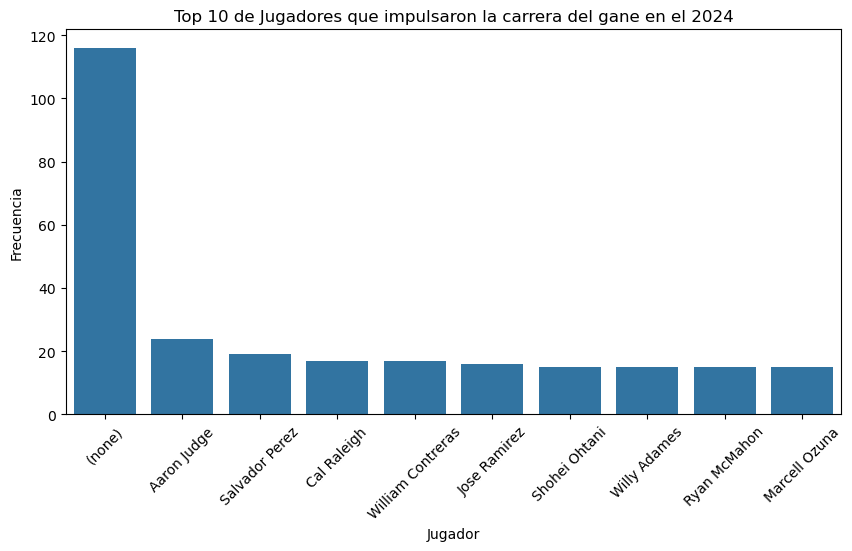

In [30]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(data= clutch_counts.head(10), x= 'Jugador', y= 'Frecuencia')

plt.xticks(rotation=45)
plt.title('Top 10 de Jugadores que impulsaron la carrera del gane en el 2024')

plt.show()

,Jugador,Frecuencia
0,Aaron Judge,24
1,Salvador Perez,19
2,Cal Raleigh,17
3,William Contreras,17
4,Jose Ramirez,16
...,...,...
467,Miguel Vargas,1
468,Austin Hays,1
469,Darell Hernaiz,1
470,Eloy Jimenez,1


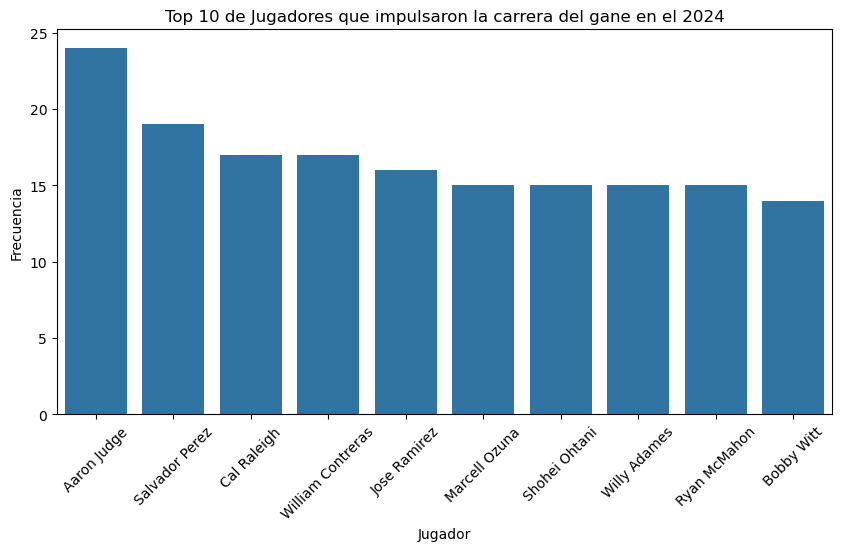

In [31]:
clutch_clean= df_2024[df_2024['GWRBI_name'] != "(none)"]

clutch_counts= clutch_clean['GWRBI_name'].value_counts().reset_index()

clutch_counts.columns= ['Jugador', 'Frecuencia']

display(clutch_counts)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(data= clutch_counts.head(10), x= 'Jugador', y= 'Frecuencia')
plt.xticks(rotation= 45)
plt.title('Top 10 de Jugadores que impulsaron la carrera del gane en el 2024')

plt.show()

In [32]:
colnames = ['date','dblheader_code','day_of_week','team_v','league_v','game_no_v',
           'team_h','league_h','game_no_h', 'runs_v', 'runs_h','outs_total','day_night',
            'completion_info','forfeit_info','protest_info','ballpark_id','attendance','game_minutes',
            'linescore_v','linescore_h',
           'AB_v','H_v','2B_v','3B_v','HR_v','RBI_v','SH_v','SF_v','HBP_v','BB_v','IBB_v','SO_v',
            'SB_v', 'CS_v','GIDP_v','CI_v','LOB_v',
            'P_num_v','ERind_v','ERteam_v','WP_v','balk_v',
            'PO_v','ASST_v','ERR_v','PB_v','DP_v','TP_v',
           'AB_h', 'H_h', '2B_h', '3B_h', 'HR_h', 'RBI_h', 'SH_h', 'SF_h', 'HBP_h', 'BB_h', 'IBB_h','SO_h',
            'SB_h', 'CS_h', 'GIDP_h', 'CI_h', 'LOB_h',
            'P_num_h', 'ERind_h', 'ERteam_h', 'WP_h', 'balk_h',
            'PO_h', 'ASST_h', 'ERR_h', 'PB_h', 'DP_h', 'TP_h',
            'ump_HB_id', 'ump_HB_name','ump_1B_id', 'ump_1B_name','ump_2B_id', 'ump_2B_name',
            'ump_3B_id', 'ump_3B_name','ump_LF_id', 'ump_LF_name','ump_RF_id', 'ump_RF_name',
            'mgr_id_v', 'mgr_name_v', 'mgr_id_h', 'mgr_name_h',
            'pitcher_id_w','pitcher_name_w','pitcher_id_l','pitcher_name_l','pitcher_id_s','pitcher_name_s',
            'GWRBI_id','GWRBI_name','pitcher_start_id_v','pitcher_start_name_v','pitcher_start_id_h','pitcher_start_name_h',
            'batter1_name_v', 'batter1_id_v', 'batter1_pos_v', 'batter2_name_v', 'batter2_id_v', 'batter2_pos_v',
            'batter3_name_v', 'batter3_id_v', 'batter3_pos_v', 'batter4_name_v', 'batter4_id_v', 'batter4_pos_v',
            'batter5_name_v', 'batter5_id_v', 'batter5_pos_v', 'batter6_name_v', 'batter6_id_v', 'batter6_pos_v',
            'batter7_name_v', 'batter7_id_v', 'batter7_pos_v', 'batter8_name_v', 'batter8_id_v', 'batter8_pos_v',
            'batter9_name_v', 'batter9_id_v', 'batter9_pos_v', 'batter1_name_h', 'batter1_id_h', 'batter1_pos_h',
            'batter2_name_h', 'batter2_id_h', 'batter2_pos_h', 'batter3_name_h', 'batter3_id_h', 'batter3_pos_h',
            'batter4_name_h', 'batter4_id_h', 'batter4_pos_h', 'batter5_name_h', 'batter5_id_h', 'batter5_pos_h',
            'batter6_name_h', 'batter6_id_h', 'batter6_pos_h', 'batter7_name_h', 'batter7_id_h', 'batter7_pos_h',
            'batter8_name_h', 'batter8_id_h', 'batter8_pos_h', 'batter9_name_h', 'batter9_id_h', 'batter9_pos_h',           
           'misc_info','acqui_info'
           ]

## Carreras por equipo en el 2024 (orden descendente)

In [33]:

# 'team_v', 'team_h', 'runs_v', 'runs_h'

home_runs= df_2024.groupby('team_h')['runs_h'].sum()
                           
visitor_runs= df_2024.groupby('team_v')['runs_v'].sum()

total_runs= home_runs.add(visitor_runs)

total_runs_df= total_runs.sort_values(ascending= False).reset_index()

total_runs_df.columns= ['Equipo', 'Total de carreras']

display(total_runs_df.style.hide(axis='index'))


Equipo,Total de carreras
ARI,886
LAN,842
NYA,815
BAL,786
PHI,784
MIL,777
NYN,768
SDN,760
BOS,751
MIN,742


## Cantidad de juegos nocturnos y diurnos

In [34]:

# 'day_night'

juegos_día_noche= (df_2024['day_night'].replace({'N':'Night', 'D': 'Day'}).value_counts().reset_index())
juegos_día_noche.columns= ['Tipo_de_juego', 'Cantidad']

tabla_limpia=juegos_día_noche.reset_index(drop= True)
display(tabla_limpia.style.hide(axis="index"))


Tipo_de_juego,Cantidad
Night,1498
Day,931


### Porcentaje de juegos de día y de noche

In [35]:

juegos_día_noche['Porcentaje'] = (
    juegos_día_noche['Cantidad'] / juegos_día_noche['Cantidad'].sum() * 100
).round(2).astype(str) + '%'

tabla_limpia = juegos_día_noche.reset_index(drop= True)
display(tabla_limpia.style.hide(axis="index"))

Tipo_de_juego,Cantidad,Porcentaje
Night,1498,61.67%
Day,931,38.33%


## Total de anotaciones por parte del equipo de casa y equipo visitante 

In [36]:

#'RBI_v'
#'RBI_h'

casa= df_2024['RBI_h'].sum()
visita= df_2024['RBI_v'].sum()

totales= pd.DataFrame({
    'Tipo': ['Casa', 'Visitante'],
    'Carreras': [casa, visita]
})
    
tabla_limpia= totales
display(tabla_limpia.style.hide(axis= "index"))




Tipo,Carreras
Casa,10163
Visitante,10216


## Comparación de cantidad de tipo de imparable entre equipo de casa y equipo visitante.

In [37]:
# Comparar cantidad de tipo de imparable entre equipo de casa y equipo visitante
# 'H_v','2B_v','3B_v','HR_v'
# 'H_h', '2B_h', '3B_h', 'HR_h'

h1_visita= df_2024['H_v'].sum()
h1_casa= df_2024['H_h'].sum()

h2_visita= df_2024['2B_v'].sum()
h2_casa= df_2024['2B_h'].sum()

h3_visita= df_2024['3B_v'].sum()
h3_casa= df_2024['3B_h'].sum()

HR_visita= df_2024['HR_v'].sum()
HR_casa= df_2024['HR_h'].sum()

import pandas as pd

hits_df = pd.DataFrame({
    'Tipo_hit': ['Single', 'Double', 'Triple', 'HR'],
    'Home': [h1_casa, h2_casa, h3_casa, HR_casa],
    'Visitor': [h1_visita, h2_visita, h3_visita, HR_visita]
})

hits_long = hits_df.melt(
    id_vars='Tipo_hit',
    value_vars=['Home', 'Visitor'],
    var_name='Equipo',
    value_name='Cantidad'
)

hits_pivot= hits_long.pivot_table(
    index= 'Tipo_hit',
    columns= 'Equipo',
    values= 'Cantidad'
).reset_index()

orden_hits= ['Single', 'Double', 'Triple', 'HR']
hits_pivot['Tipo_hit']= pd.Categorical(hits_pivot['Tipo_hit'], categories=orden_hits, ordered= True) 
hits_pivot[['Home', 'Visitor']] = hits_pivot[['Home', 'Visitor']].astype(int)
hits_pivot['Difference Home vs Visitor'] = hits_pivot['Home'] - hits_pivot['Visitor']

hits_pivot=hits_pivot.sort_values('Tipo_hit')
display(hits_pivot.style.hide(axis='index'))

Tipo_hit,Home,Visitor,Difference Home vs Visitor
Single,19484,20339,-855
Double,3837,3934,-97
Triple,351,346,5
HR,2736,2717,19


### Visualización

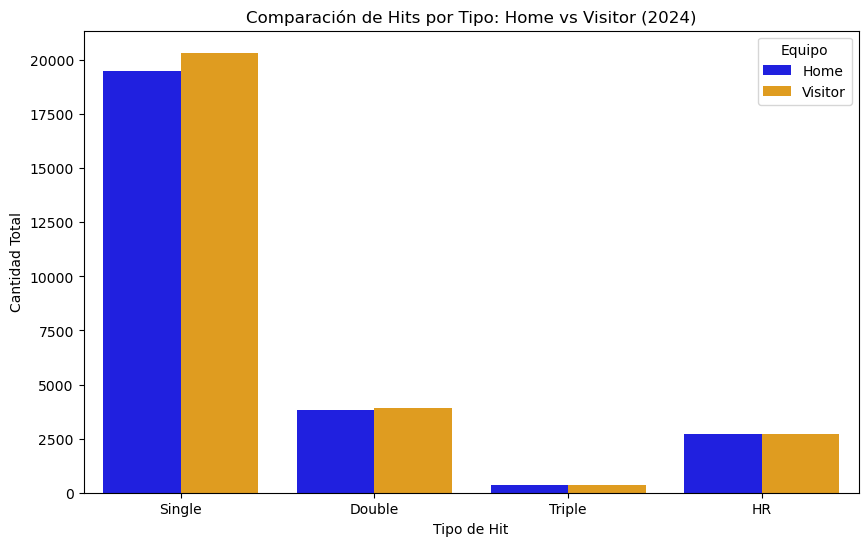

In [38]:
#Graficarlos

h1_visita= df_2024['H_v'].sum()
h1_casa= df_2024['H_h'].sum()

h2_visita= df_2024['2B_v'].sum()
h2_casa= df_2024['2B_h'].sum()

h3_visita= df_2024['3B_v'].sum()
h3_casa= df_2024['3B_h'].sum()

HR_visita= df_2024['HR_v'].sum()
HR_casa= df_2024['HR_h'].sum()

import pandas as pd

hits_df = pd.DataFrame({
    'Tipo_hit': ['Single', 'Double', 'Triple', 'HR'],
    'Home': [h1_casa, h2_casa, h3_casa, HR_casa],
    'Visitor': [h1_visita, h2_visita, h3_visita, HR_visita]
})

hits_long = hits_df.melt(
    id_vars='Tipo_hit',
    value_vars=['Home', 'Visitor'],
    var_name='Equipo',
    value_name='Cantidad'
)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

palette = {
    'Home': 'blue',       # Local en azul
    'Visitor': 'orange'   # Visitante en naranja
}

sns.barplot(
    data=hits_long,
    x='Tipo_hit',
    y='Cantidad',
    hue='Equipo',
    palette=palette
)

plt.title("Comparación de Hits por Tipo: Home vs Visitor (2024)")
plt.xlabel("Tipo de Hit")
plt.ylabel("Cantidad Total")
plt.legend(title="Equipo")

plt.show()



## Asistencia general por mes al parque de pelota

In [39]:
import pandas as pd

# Asegurar que attendance sea numérica
df_2024['attendance'] = pd.to_numeric(df_2024['attendance'], errors='coerce')

# Crear mes numérico desde 'MES' (ej: "03" -> 3)
df_2024['Mes_num'] = pd.to_numeric(df_2024['MES'], errors='coerce')

# Tabla de asistencia mensual
asistencia_mensual = (
    df_2024.dropna(subset=['Mes_num', 'attendance'])
    .groupby('Mes_num', as_index=False)['attendance']
    .sum()
    .sort_values('Mes_num')
)

print(
    asistencia_mensual
    .assign(attendance=asistencia_mensual['attendance'].astype(int))
    .to_string(index=False)
)

print()

display(asistencia_mensual.astype(int))

 Mes_num  attendance
       3     1671925
       4    10391306
       5    11440648
       6    12461413
       7    11505864
       8    12236194
       9    11641055



,Mes_num,attendance
0,3,1671925
1,4,10391306
2,5,11440648
3,6,12461413
4,7,11505864
5,8,12236194
6,9,11641055


## Bases robadas equipo local y equipo visitante

In [40]:
# 'SB_v'
# 'SB_h'
# 'team_v'
# 'team_h'

bases_robadas_local= df_2024.groupby('team_h')['SB_h'].sum().sort_values(ascending= False).reset_index()
bases_robadas_visitante= df_2024.groupby('team_v')['SB_v'].sum().sort_values(ascending= False).reset_index()

bases_robadas_local.columns= ['Equipo local', 'Bases robadas']
bases_robadas_visitante.columns= ['Equipo visitante', 'Bases robadas']

#print(bases_robadas_local)
#print()
#print(bases_robadas_visitante)

display(bases_robadas_local.style.hide(axis='index'))
print()
display(bases_robadas_visitante.style.hide(axis='index'))


Equipo local,Bases robadas
MIL,119
TBA,102
WAS,102
CIN,90
SEA,75
CLE,68
PHI,65
LAN,64
KCA,62
CHN,60


Equipo visitante,Bases robadas
WAS,121
CIN,117
MIL,98
BOS,87
CHN,83
PHI,83
CLE,80
TBA,76
ANA,75
KCA,72


### Unificar en una sola tabla comparativa

In [41]:
# Paso 1: Unificar nombres de columna “Equipo”

bases_robadas_local = bases_robadas_local.rename(columns={'Equipo local': 'Equipo'})
bases_robadas_visitante = bases_robadas_visitante.rename(columns={'Equipo visitante': 'Equipo'})

In [42]:
# Paso 2: Hacer el merge (unión)

bases_robadas= bases_robadas_local.merge(
    bases_robadas_visitante,
    on='Equipo',
    how='outer',
    suffixes=('_Local', '_Visitante')
)

In [43]:
# Paso 3: Calcular la diferencia


bases_robadas['Diferencia Local - Visitante'] = (
    bases_robadas['Bases robadas_Local'] - bases_robadas['Bases robadas_Visitante']
)

In [44]:
# Paso 4: Ordenar (opcional pero recomendado)

bases_robadas = bases_robadas.sort_values(
    by='Diferencia Local - Visitante',
    ascending=False
)

In [45]:
# Paso 5: Visualizar limpio (sin índice)

print(bases_robadas.to_string(index=False))

Equipo  Bases robadas_Local  Bases robadas_Visitante  Diferencia Local - Visitante
   TBA                  102                       76                            26
   MIL                  119                       98                            21
   HOU                   55                       38                            17
   SEA                   75                       65                            10
   SLN                   45                       46                            -1
   ATL                   34                       35                            -1
   COL                   41                       44                            -3
   TOR                   34                       38                            -4
   TEX                   46                       51                            -5
   MIA                   60                       65                            -5
   OAK                   45                       53                            -8
   N

### ¿Qué día de la semana se anotaron más carreras?

In [48]:
carreras_por_dia = (
    df_2024
    .groupby('day_of_week')['RBI_TOTAL']
    .sum()
    .reset_index()
    .sort_values('RBI_TOTAL', ascending=False)
)

carreras_por_dia.columns= ['Día de la semana', 'Carreras totales']

display(carreras_por_dia.style.hide(axis="index"))



Día de la semana,Carreras totales
Sat,3627
Sun,3357
Fri,3252
Wed,3103
Tue,2993
Mon,2098
Thu,1949
